In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [46]:
train = pd.read_csv("data/train_115850.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71665 entries, 0 to 71664
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          71665 non-null  int64 
 1   date        71665 non-null  object
 2   store_nbr   71665 non-null  int64 
 3   item_nbr    71665 non-null  int64 
 4   unit_sales  71665 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.7+ MB


In [47]:
train.shape

(71665, 5)

In [48]:
train["item_nbr"].value_counts()

item_nbr
115850    71665
Name: count, dtype: int64

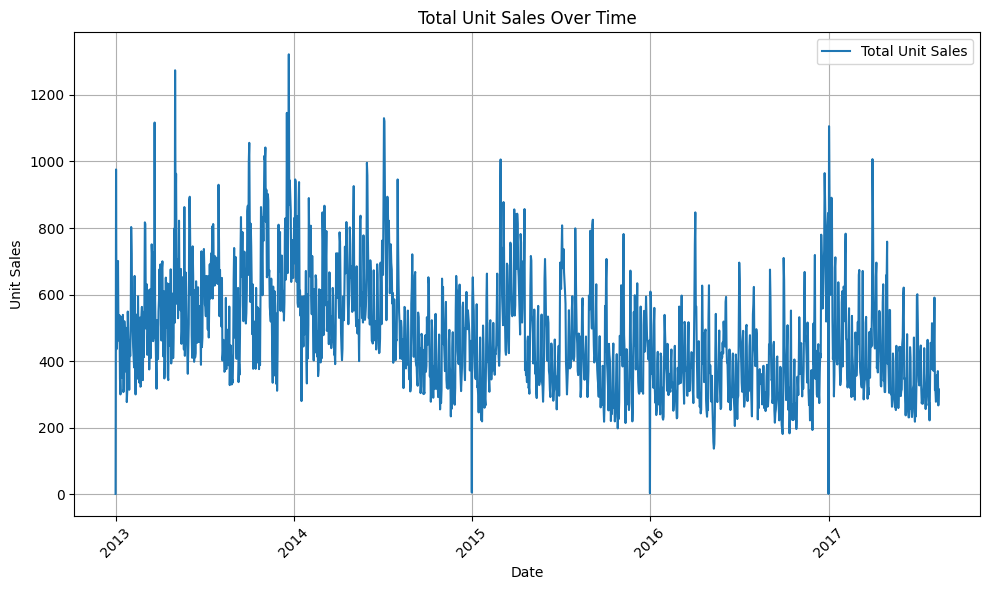

In [49]:
train['date'] = pd.to_datetime(train['date'])
sales_per_date = train.groupby('date')['unit_sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_per_date.index, sales_per_date.values, label='Total Unit Sales')

plt.title('Total Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

In [50]:
stores = pd.read_csv("data/stores.csv")
stores.drop(["type", "cluster"], axis=1, inplace=True)
stores.head()

,store_nbr,city,state
0,1,Quito,Pichincha
1,2,Quito,Pichincha
2,3,Quito,Pichincha
3,4,Quito,Pichincha
4,5,Santo Domingo,Santo Domingo de los Tsachilas


In [51]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales
0,15,2013-01-01,25,115850,1
1,603,2013-01-02,1,115850,3
2,1621,2013-01-02,2,115850,11
3,2727,2013-01-02,3,115850,12
4,3924,2013-01-02,4,115850,15


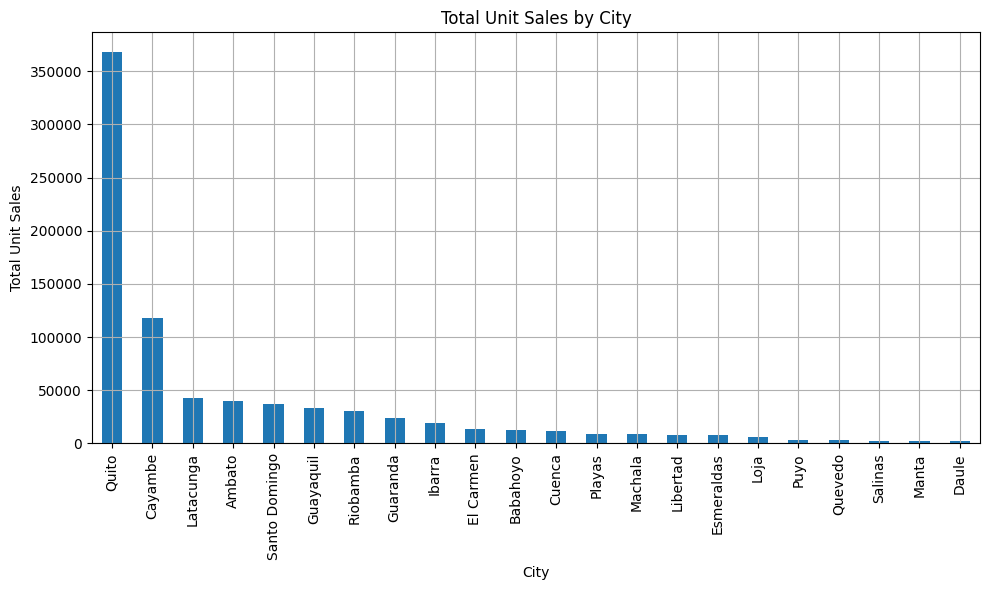

In [55]:
merged_data = pd.merge(train, stores, on='store_nbr')

sales_per_city = merged_data.groupby('city')['unit_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_per_city.plot(kind='bar')
plt.title('Total Unit Sales by City')
plt.xlabel('City')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

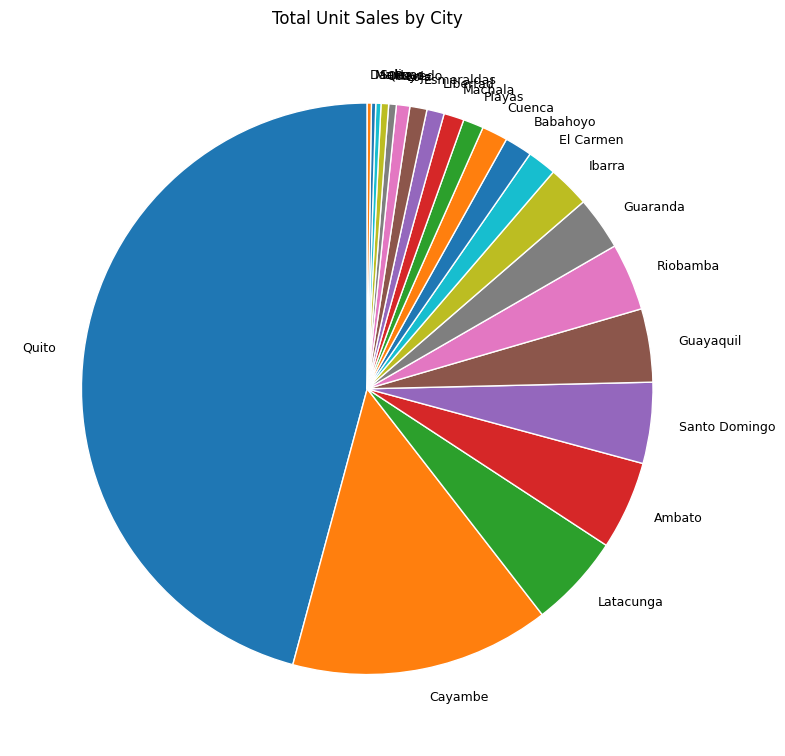

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(
    sales_per_city,
    labels=sales_per_city.index,
    startangle=90,
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 9}
)

plt.title('Total Unit Sales by City')
plt.tight_layout()
plt.show()

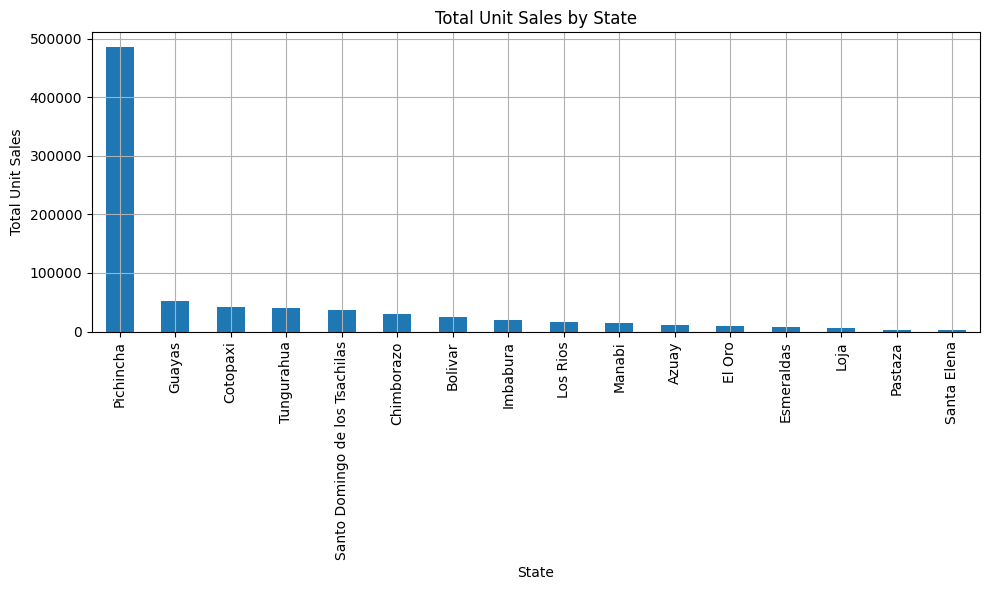

In [57]:
sales_per_state = merged_data.groupby('state')['unit_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_per_state.plot(kind='bar')
plt.title('Total Unit Sales by State')
plt.xlabel('State')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

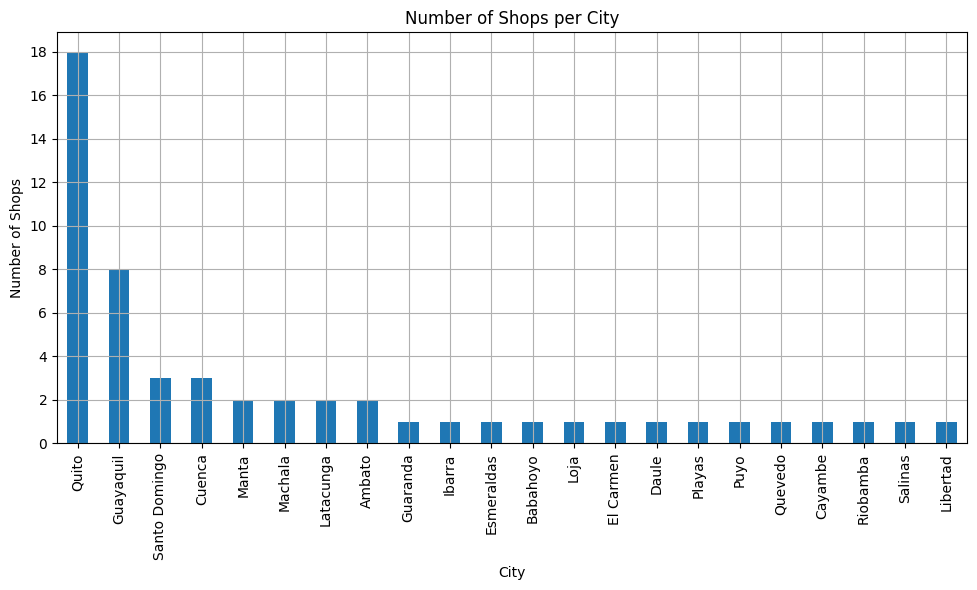

In [54]:
shops_per_city = stores.groupby('city')['store_nbr'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = shops_per_city.plot(kind='bar')
plt.title('Number of Shops per City')
plt.xlabel('City')
plt.ylabel('Number of Shops')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

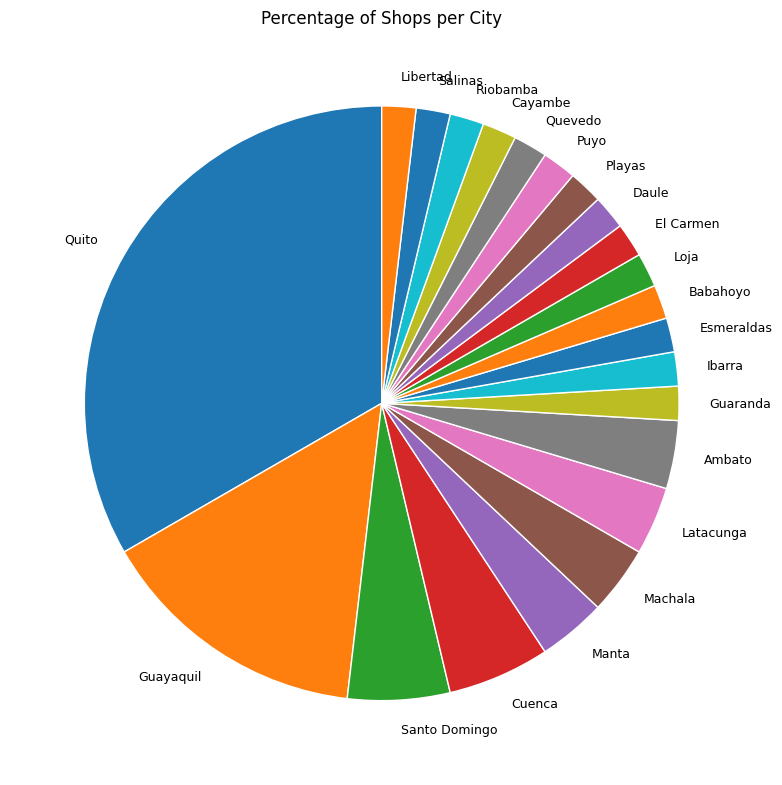

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(
    shops_per_city,
    labels=shops_per_city.index,
    startangle=90,
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 9}
)

plt.title('Percentage of Shops per City')
plt.tight_layout()
plt.show()